In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


data = pd.read_csv("flood.csv")


data['Human injury'] = data['Human injury'].str.replace(',', '').astype(float)


X = data[['Duration(Days)', 'Severity']]
y = data['Human injury']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", mse**0.5)


Epoch 1/50


c:\Users\shama\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 247213.1406 - val_loss: 289803.4688
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135193.4531 - val_loss: 287567.1875
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185253.5781 - val_loss: 285233.3438
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80616.6016 - val_loss: 283809.1250
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131032.6328 - val_loss: 283255.8438
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182580.1562 - val_loss: 282743.2500
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108920.5781 - val_loss: 282514.9062
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119340.3359 - val_loss: 282229.5312
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170862.2969 - val_loss: 281960.8125
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121939.3750 - val_loss: 281972.7188
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106036.9141 

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 98.33296304614232
Root Mean Squared Error: 402.83522871791945


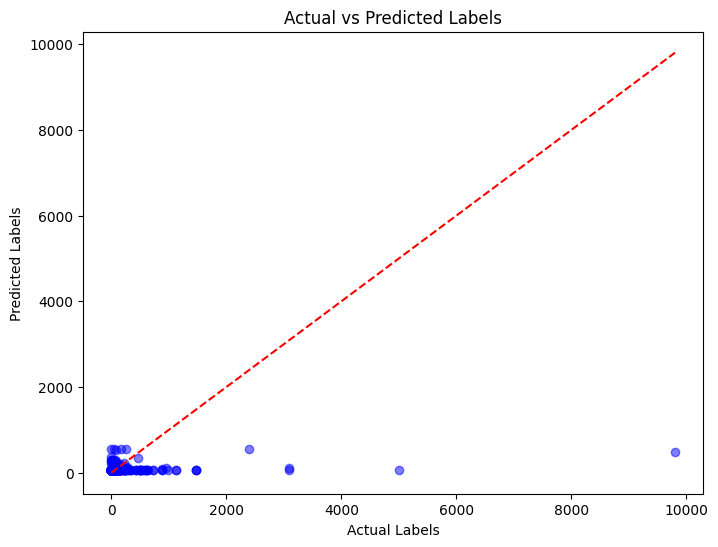

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




mae = mean_absolute_error(y_test, predictions)


mse = mean_squared_error(y_test, predictions)


rmse = mean_squared_error(y_test, predictions, squared=False)


r2 = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 98.33296304614232
Mean Squared Error (MSE): 162276.2214962185
Root Mean Squared Error (RMSE): 402.83522871791945
R-squared (R2): 0.054973579968290776
